# Bank Marketing Data Set

Hacktiv8 PTP Introduction to Data Science Projects 3

Author: [Yoga Perdana Putra](https://github.com/yogaperdana)

***

## 1. Introduction

The aim of this projects is to do practical data classification with Python using the [Bank Marketing Data Set from UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

### 1.1. Data Set Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. `bank-additional-full.csv` with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010).
2. `bank-additional.csv` with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. `bank-full.csv` with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. `bank.csv` with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### 1.2. Attribute Information

**Input Variables**:

-   Bank client data:
    1. `age` (numeric)
    2. `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3. `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4. `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5. `default`: has credit in default? (categorical: 'no','yes','unknown')
    6. `housing`: has housing loan? (categorical: 'no','yes','unknown')
    7. `loan`: has personal loan? (categorical: 'no','yes','unknown')


-   Related with the last contact of the current campaign:
    8. `contact`: contact communication type (categorical: 'cellular','telephone')
    9. `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10. `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11. `duration`: last contact duration, in seconds (numeric). **Important note**: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


-   Other attributes:
    12. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14. `previous`: number of contacts performed before this campaign and for this client (numeric)
    15. `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


-   Social and economic context attributes:
    16. `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
    17. `cons.price.idx`: consumer price index - monthly indicator (numeric)
    18. `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)
    19. `euribor3m`: euribor 3 month rate - daily indicator (numeric)
    20. `nr.employed`: number of employees - quarterly indicator (numeric)

**Output Variable** (Desired Target):

21. `y` - has the client subscribed a term deposit? (binary: '**yes**','**no**')

---

## 2. Data Preparation

The first thing is to importing all libraries that will be used on this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

%matplotlib inline
sns.set_style("whitegrid")

Then, reading the downloaded dataset file and assigning to a data frame.

**Note: We're using `bank-additional-full.csv` dataset file.**

In [2]:
df = pd.read_csv('dataset/bank-additional-full.csv', sep=';')
print('Data is successfully loaded.')

Data is successfully loaded.


According to the dataset documentation, we need to remove the `duration` column because in real-case the duration is only known after the label column is known. This problem can be considered to be 'data leakage' where predictors include data that will not be available at the time we make predictions.

In [3]:
df.drop('duration', axis=1, inplace=True)

Let's view the top and bottom 5 rows of the dataset.

In [4]:
display(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Let's view the dimensions of the dataframe:

In [5]:
print('Total rows   :', df.shape[0])
print('Total columns:', df.shape[1])

Total rows   : 41188
Total columns: 20


Getting basic information about data types of each features in data frame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

Checking the missing values in the data frame

In [7]:
display(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

So far, it seems that there is no missing or null value found in data frame. But, we also have to check for duplicate rows.

In [8]:
print('Total duplicated rows:', sum(df.duplicated()))

Total duplicated rows: 1784


The dataframe has 12 duplicated rows (exluding the original rows). Feeling curious, let's look at the data, including the original values.

In [9]:
display(df[df.duplicated(keep=False)])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40404,41,entrepreneur,married,university.degree,no,yes,no,cellular,aug,thu,1,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,yes
40804,35,technician,married,professional.course,no,yes,no,cellular,sep,thu,1,999,2,failure,-1.1,94.199,-37.5,0.878,4963.6,no
40806,35,technician,married,professional.course,no,yes,no,cellular,sep,thu,1,999,2,failure,-1.1,94.199,-37.5,0.878,4963.6,no
40833,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no


Let's drop those duplicates from data frame.

In [10]:
df.drop_duplicates(inplace=True)
print('Total duplicated rows now:', sum(df.duplicated()))
print('Total rows now:', df.shape[0])

Total duplicated rows now: 0
Total rows now: 39404


We have to process the object data type columns into categorical, according to the database explanation that previously mentioned. 

In [11]:
cols_ctg = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for col in cols_ctg:
    df[col] = df[col].astype('category')

Renaming `y` column name to `deposit` for convenience.

In [12]:
df.rename(columns={'y': 'deposit'}, inplace=True)

Checking once again for the features information of data frames.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             39404 non-null  int64   
 1   job             39404 non-null  category
 2   marital         39404 non-null  category
 3   education       39404 non-null  category
 4   default         39404 non-null  category
 5   housing         39404 non-null  category
 6   loan            39404 non-null  category
 7   contact         39404 non-null  category
 8   month           39404 non-null  category
 9   day_of_week     39404 non-null  category
 10  campaign        39404 non-null  int64   
 11  pdays           39404 non-null  int64   
 12  previous        39404 non-null  int64   
 13  poutcome        39404 non-null  category
 14  emp.var.rate    39404 non-null  float64 
 15  cons.price.idx  39404 non-null  float64 
 16  cons.conf.idx   39404 non-null  float64 
 17  euribor3m   

---

## 3. Exploratory Data Analysis

We are going to explore more about the dataset.

### 3.1. Numerical Features

First, let's check for descriptive statistics of numerical features.

In [14]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,39404.0,40.116105,10.460328,17.000,32.000,38.000,47.000,98.000
campaign,39404.0,2.618744,2.814780,1.000,1.000,2.000,3.000,56.000
pdays,39404.0,960.847097,190.869184,0.000,999.000,999.000,999.000,999.000
previous,39404.0,0.178738,0.503172,0.000,0.000,0.000,0.000,7.000
emp.var.rate,39404.0,0.064067,1.577041,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,39404.0,93.577538,0.583820,92.201,93.075,93.798,93.994,94.767
cons.conf.idx,39404.0,-40.499604,4.644327,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,39404.0,3.601243,1.742337,0.634,1.334,4.857,4.961,5.045
nr.employed,39404.0,5165.986481,72.763866,4963.600,5099.100,5191.000,5228.100,5228.100


We have some insights from that:
- Target `age` range from 17 to 98 years old.
- Some data (e.g. `duration`, `campaign`, etc.) is suspected to have outliers because of their wide range of values.
- `duration`, `pdays`, and `previous` has 0 value as the minimum.
- Some variables have negative value (e.g. `emp.var.rate` and `cons.conf.idx`)

Let's get into the numerical features.

In [15]:
cols_num = df.select_dtypes(include='number').columns.tolist()
print(cols_num)

['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


We are going to visualize each target to see if some features show tendency that may affect their decision whether to subscribe or not. We're using boxplot to map the range and distribution of features divided into their preference to subscribe, and distplot to see the distribution of the features

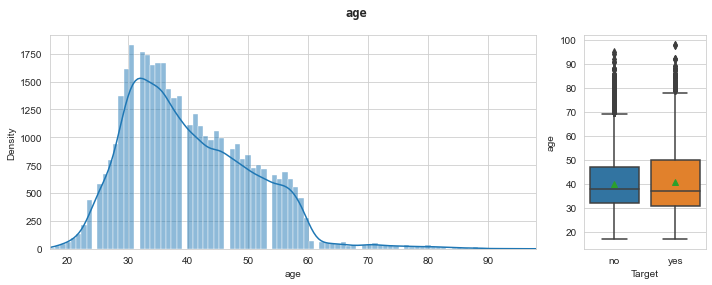

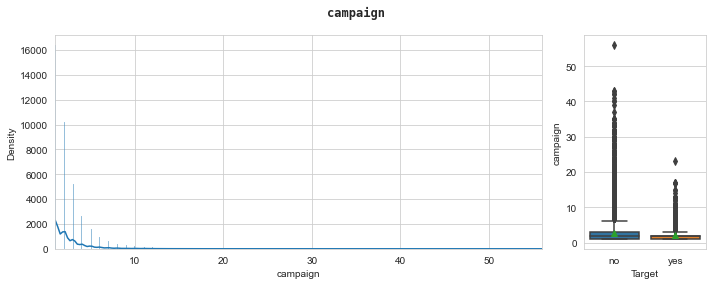

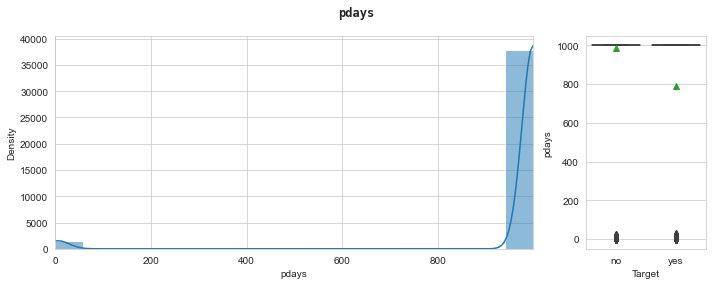

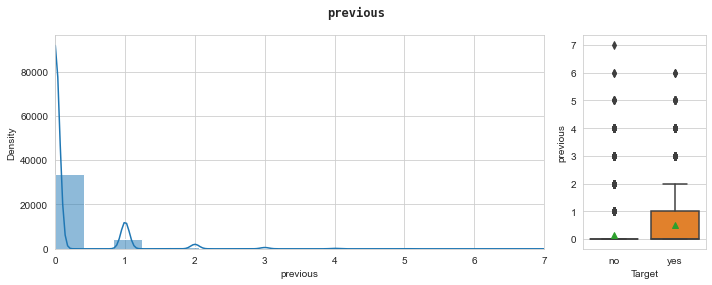

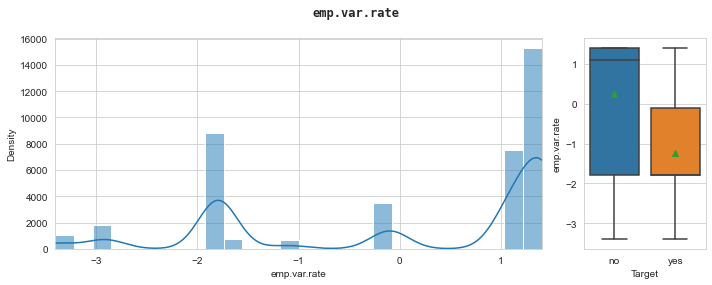

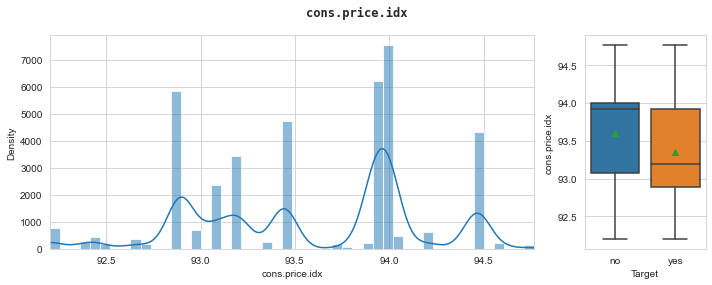

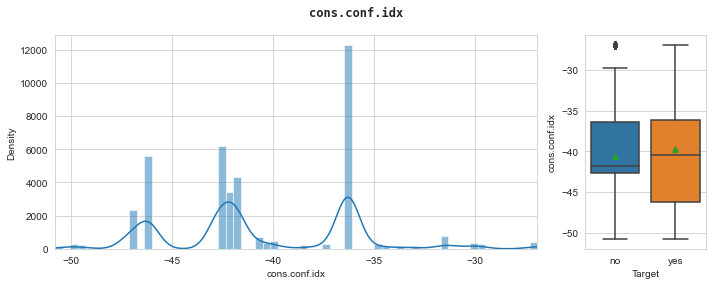

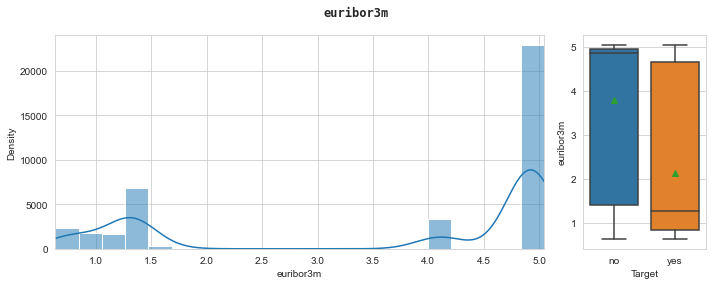

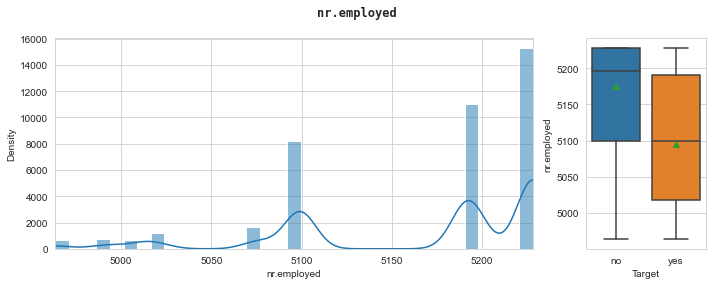

In [16]:
for col in cols_num:
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(10, 4), tight_layout=True)
    fig.suptitle(col, fontsize='large', fontweight='bold', family='monospace')

    sns.histplot(df[col], ax=ax[0], kde=True)
    ax[0].set_ylabel('Density')
    ax[0].margins(x=0)

    sns.boxplot(ax=ax[1], x='deposit', y=col, data=df, showmeans=True)
    ax[1].set_xlabel('Target')

    plt.show()

Some insights based on the plots:

- Age range of the customer is from 17 to 98 years old, but mostly are in between 20-60.
- The target customer mostly has more than 5000 employees. Those who has relatively less employees (ranging from 5000-5200) tend to subscribe to a term deposit.

### 3.2. Categorical Features

Next, we are going to get the categorical features.

In [17]:
cols_ctg = df.select_dtypes(include='category').columns.tolist()
print(cols_ctg)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']


Let's visualize the distribution of every input in each categorical features using countplot.

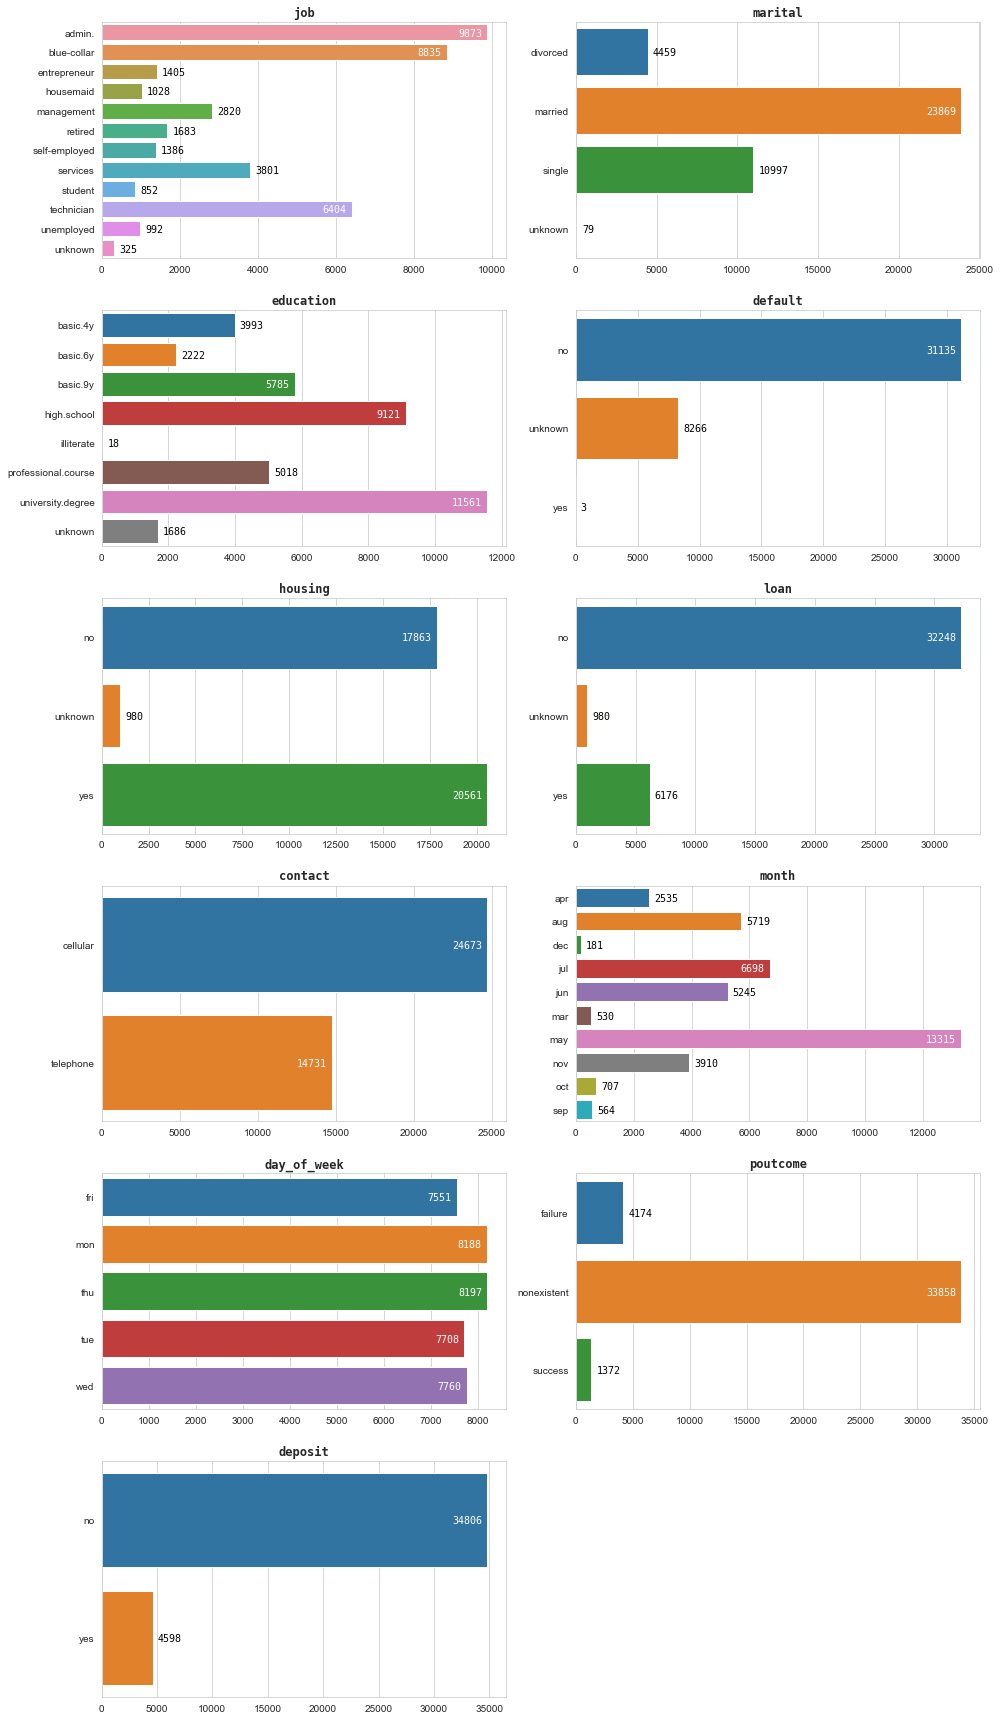

In [18]:
plot_cols = 2
plot_rows = int(-1 * (-1 * len(cols_ctg) // plot_cols))

fig = plt.figure(figsize=(7*plot_cols, 4*plot_rows))

for n_plot, c in enumerate(cols_ctg):
    ax = plt.subplot(plot_rows, plot_cols, n_plot+1)
    sns.countplot(y=c, data=df)
    plt.title(c, fontsize='large', fontweight='bold', family='monospace')
    plt.xlabel('')
    plt.ylabel('')
    
    col_half = df[c].value_counts().max() / 2
    for i, p in enumerate(ax.patches):
        if p.get_width() < col_half:
            x_text, align, color = 5, 'left', 'black'
        else:
            x_text, align, color = -5, 'right', 'white'
        ax.annotate(str(p.get_width()), xy=(p.get_width(), p.get_y() + p.get_height() / 2), 
                    textcoords="offset points", xytext=(x_text, -3.5), ha=align, 
                    color=color, family='monospace')

plt.tight_layout(h_pad=2)
plt.show()

Insights from the plots:

- Most of the customer work either as an admin, blue-collar, or technician.
- Most of the customer are married.
- Most of the customer has university and high school degree.
- Most of the customer doesn't do credit transaction.
- Most of the customer are using cellular number for their contact.
- Most of the customer has a housing loan. On the other side, majority of them doesn't have personal loan.
- The previous campaign doesn't show significant result.
- Most of the targets haven't subscribed to a term deposit.

---

## 4. Data Preprocessing

### 4.1. Data Outliers Treatment

We will try to remove outlier data from numeric features. Previously, we have seen that `age` and `campaign` have a left skewed data distribution. Of course, we must know in advance starting from what value is considered an outlier for each feature by calculating the upper limit of interquartile range.

In [19]:
df_prep = df.copy()
shape_init = df_prep.shape

#IQR = Q3 - Q1
#UL = Q3 + 1.5 * IQR
def uiqr(f):
    return df_prep[f].quantile(q=0.75) + 1.5 * (df_prep[f].quantile(q=0.75) - df_prep[f].quantile(q=0.25))
    
def info_out(feature):
    count = df_prep[df_prep[feature] > uiqr(feature)][feature].count()
    print(feature.capitalize(), 'above', uiqr(feature), 'are outliers')
    print('Outliers: ' + str(count) + ' from ' + str(len(df_prep)) + ' rows (' 
          + str(round(count*100/len(df_prep), 2)) + '%)')

def rem_out(feature):
    global df_prep
    info_out(feature)
    df_prep = df_prep[df_prep[feature] <= uiqr(feature)]
    print('Outliers removed.')
    print('-' * 40)

print('Initial data frame shape:', shape_init)
print('-' * 40)

cols_out = ['age', 'campaign']
for col in cols_out:
    rem_out(col)

shape_now = df_prep.shape
row_diff = shape_init[0]-shape_now[0]
print('Current data frame shape:', shape_now)
print('Removed total ' + str(row_diff) + ' rows (' + str(round(row_diff*100/shape_init[0], 2)) + '%)')

Initial data frame shape: (39404, 20)
----------------------------------------
Age above 69.5 are outliers
Outliers: 458 from 39404 rows (1.16%)
Outliers removed.
----------------------------------------
Campaign above 6.0 are outliers
Outliers: 2384 from 38946 rows (6.12%)
Outliers removed.
----------------------------------------
Current data frame shape: (36562, 20)
Removed total 2842 rows (7.21%)


Let's view again the visualization of those features.

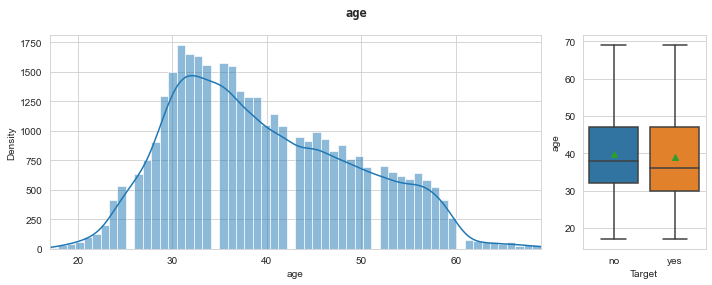

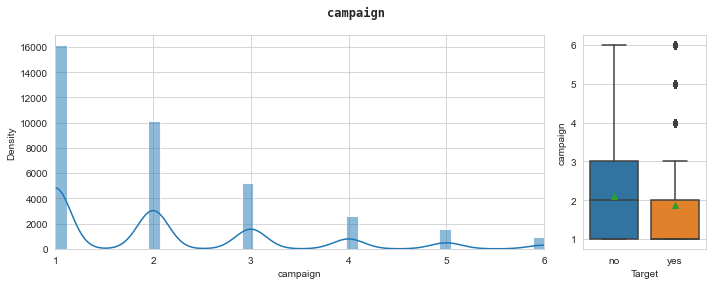

In [20]:
for col in cols_out:
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(10, 4), tight_layout=True)
    fig.suptitle(col, fontsize='large', fontweight='bold', family='monospace')

    sns.histplot(df_prep[col], ax=ax[0], kde=True)
    ax[0].set_ylabel('Density')
    ax[0].margins(x=0)

    sns.boxplot(ax=ax[1], x='deposit', y=col, data=df_prep, showmeans=True)
    ax[1].set_xlabel('Target')

    plt.show()

### 4.2. Encoding Categorical Features

The categorical data should be encoded so that it can be compared to numerical data. Values in `deposit` features must be replaced separately to avoid encoding with the opposite result, where 1 should be for 'yes' and 0 should be for 'no'. For now, we're using `LabelEncoder` to encode the rest.\
Another methods that can be used is using `get_dummies` to convert categorical variable into dummy/indicator variables.

In [21]:
df_prep['deposit'] = df_prep['deposit'].replace({'yes': 1, 'no': 0})
cols_ctg.remove('deposit')

In [22]:
LE = LabelEncoder()
for c in cols_ctg:
    df_prep[c] = LE.fit_transform(df_prep[c])

with pd.option_context('max_columns', None):
    display(df_prep.sample(n=10, random_state=1))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
33033,31,9,2,6,0,2,0,0,6,1,2,999,0,1,-1.8,92.893,-46.2,1.299,5099.1,0
3619,57,5,1,3,1,2,0,1,6,0,2,999,0,1,1.1,93.994,-36.4,4.859,5191.0,0
19836,32,0,1,6,1,2,0,0,1,0,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0
16806,57,6,1,6,0,0,0,0,3,2,1,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
38823,39,4,2,6,0,2,0,0,7,0,2,3,2,2,-3.4,92.649,-30.1,0.714,5017.5,1
36721,36,9,2,5,0,0,0,0,4,0,2,999,0,1,-2.9,92.963,-40.8,1.268,5076.2,1
30441,39,0,1,3,0,2,0,0,6,1,3,999,0,1,-1.8,92.893,-46.2,1.354,5099.1,1
24058,31,9,2,6,0,0,0,1,8,2,1,999,0,1,-0.1,93.798,-40.4,4.794,5195.8,1
1180,39,0,1,1,1,0,0,1,6,2,2,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
28099,43,4,1,6,1,0,0,0,0,0,2,999,0,1,-1.8,93.075,-47.1,1.479,5099.1,0


### 4.3. Correlation of Features

Let's explore again about the correlation between each features using heatmap visualization.

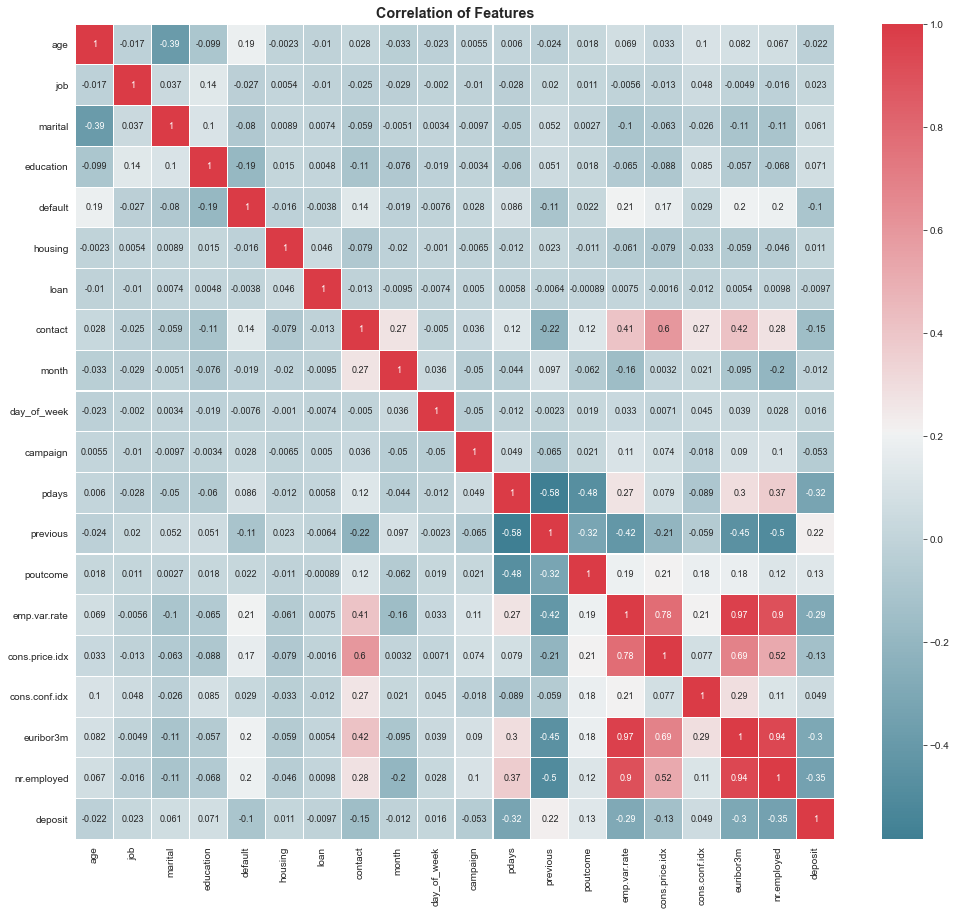

In [23]:
plt.figure(figsize=(17, 15))
plt.title('Correlation of Features', fontsize='x-large', fontweight='bold')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_prep.corr(), annot=True, cmap=cmap, linewidths=.1, annot_kws={'size': 9})
plt.show()

The heatmap shows correlation between features through numbers and colors. As we can see, red indicates positive correlation and teal color indicates negative correlation. There are some features that have high correlation each other. Another option is to drop some of them.

---

### 4.4. Split Data

Before it can be used for modeling, we need to separate input features into $x$ variable and assign the target feature into $y$ variable. Then, separate our data into training set and test set with 7:3 ratio.

In [24]:
x = df_prep.drop('deposit', 1)
y = df_prep.deposit
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)

print('Data frame size:', df_prep.shape)
print('Training set size:', x_train.shape)
print('Test set size:', x_test.shape)

Data frame size: (36562, 20)
Training set size: (25593, 19)
Test set size: (10969, 19)


### 4.5. Scale Data

We need to scaling input features to meet standard normal distribution and is expected to help to improve model's accuracy.

In [25]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

display(x_test_scaled)

array([[-0.58180145,  1.45752596,  1.3522696 , ..., -2.03694114,
        -1.18649073, -0.92086676],
       [-0.88934956,  1.45752596,  1.3522696 , ...,  0.96321926,
         0.79282621,  0.86962307],
       [-0.47928541, -1.03745511, -0.28538884, ...,  0.96321926,
         0.79282621,  0.86962307],
       ...,
       [ 0.03329478,  1.45752596, -0.28538884, ...,  0.96321926,
         0.79455085,  0.86962307],
       [-1.09438164, -0.76023499, -0.28538884, ..., -0.31023012,
         0.30820112,  0.42130663],
       [ 0.85342308,  0.07142537, -0.28538884, ..., -0.31023012,
         0.30820112,  0.42130663]])

---

## 5. Data Modelling

We will create some algorithm models to predict classification data, such as: Logistic Regression, KNN, SVM, Decision Tree, Random Forest, and Naive Bayes.

### 5.1. Logistic Regression

Let's create a model with logistic regression algorithm and train the data. Then, we will get the classification report to evaluating the model.

In [26]:
model_LR = LogisticRegression(solver='liblinear', random_state=11)
model_LR.fit(x_train_scaled, y_train)
y_pred_LR = model_LR.predict(x_test_scaled)

print(classification_report(y_test, y_pred_LR), end='')

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9741
           1       0.66      0.23      0.34      1228

    accuracy                           0.90     10969
   macro avg       0.79      0.61      0.64     10969
weighted avg       0.88      0.90      0.88     10969


We can get the accuracy score for both training and test dataset.

In [27]:
result_lr = round(model_LR.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_LR.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_lr) + '%')

Training accuracy: 89.427%
Test accuracy:     90.045%


Let's visualize the confusion matrix.

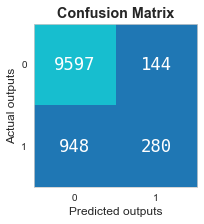

In [28]:
def cmplot(cm):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(cm, cmap='tab10')
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', fontsize='large')
    ax.set_ylabel('Actual outputs', fontsize='large')
    ax.xaxis.set(ticks=range(2))
    ax.yaxis.set(ticks=range(2))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white', 
                    fontsize='xx-large', fontfamily='monospace')
    plt.title('Confusion Matrix', fontsize='x-large', fontweight='bold')
    plt.show()

cmplot(confusion_matrix(y_test, y_pred_LR))

The obtained matrix shows the following results:

- True Positive (TP): There are **280** observations are predicted **correctly** for '**yes**' (the customer has made a deposit)
- True Negative (TN): There are **9597** observations are predicted **correctly** for '**no**' (the customer doesn't make a deposit)
- False Positive (FP): There are **144** observations are **wrongly** predicted as '**yes**'
- False Negative (FN): There are **948** observations are **wrongly** predicted as '**no**'

**Note**: 0 indicates a negative output because it represents the word 'no'. Otherwise, 1 indicates positive output because it represents the word 'yes'.

### 5.2. K-Nearest Neighbors (KNN)

Let's create a model with K-Nearest Neighbors (KNN) algorithm and train the data. To get the best accuracy score, we must find the optimum **K** value. We are going to perform prediction with K = 2 to 30 and compare them.

<font color='red'>**Notice: It will take a little longer to process the code.**</font> Timer is included to view the estimated time will take to process.

In [29]:
# It will take a little longer to process
tic = default_timer()

min_k = 2
max_k = 30
err, acc = [], []
for i in range(min_k, max_k+1):
    print('\r', 'Processing K =', i, end='. Please wait...')
    model_KNN = KNeighborsClassifier(n_neighbors=i)
    model_KNN.fit(x_train_scaled, y_train)
    y_pred_KNN = model_KNN.predict(x_test_scaled)
    err.append(np.mean(y_pred_KNN != y_test))
    acc.append(accuracy_score(y_test, y_pred_KNN))

print('\rMinimum error:   ', round(min(err), 5), 'at K =', min_k + err.index(min(err)))
print('Maximum accuracy:', round(max(acc), 5), 'at K =', min_k + acc.index(max(acc)))
k_choice = min_k + acc.index(max(acc))

toc = default_timer()
print('Elapsed time: ' + str(round(toc-tic)) + ' sec.')

Minimum error:    0.09983 at K = 22
Maximum accuracy: 0.90017 at K = 22
Elapsed time: 275 sec.


Let's visualize the performance of the model with various K value.

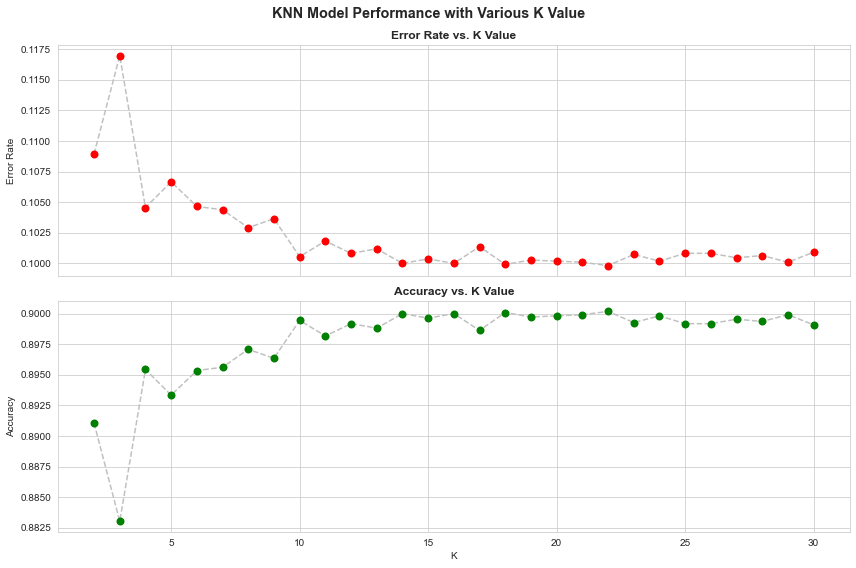

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), tight_layout=True, sharex=True)
fig.suptitle('KNN Model Performance with Various K Value', fontsize='x-large', fontweight='bold')

ax[0].plot(range(min_k, max_k+1), err, color='silver', linestyle='dashed', 
           marker='o', markerfacecolor='red', markersize=8, markeredgewidth=0)
ax[0].set_title('Error Rate vs. K Value', fontweight='bold')
ax[0].set_ylabel('Error Rate')

ax[1].plot(range(min_k, max_k+1), acc, color='silver', linestyle='dashed', 
           marker='o', markerfacecolor='green', markersize=8, markeredgewidth=0)
ax[1].set_title('Accuracy vs. K Value', fontweight='bold')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('K')

plt.show()

From the calculation and plot above, we've found that we get the best model accuracy by using the value of **K = 22**. Error rate is a mirrored value of accuracy. With that, we can get the classification report.

In [31]:
model_KNN = KNeighborsClassifier(n_neighbors=k_choice)
model_KNN.fit(x_train_scaled, y_train)
y_pred_KNN = model_KNN.predict(x_test_scaled)

print(classification_report(y_test, y_pred_KNN), end='')

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9741
           1       0.65      0.24      0.35      1228

    accuracy                           0.90     10969
   macro avg       0.78      0.61      0.65     10969
weighted avg       0.88      0.90      0.88     10969


We can get the accuracy score for both training and test dataset.

In [32]:
result_knn = round(max(acc) * 100, 3)

print('Training accuracy: ' + str(round(model_KNN.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_knn) + '%')

Training accuracy: 89.739%
Test accuracy:     90.017%


Let's visualize the confusion matrix.

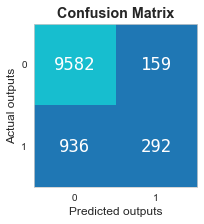

In [33]:
cmplot(confusion_matrix(y_test, y_pred_KNN))

The obtained confusion matrix shows the following results:

- True Positive (TP): There are **292** observations are predicted **correctly** for '**yes**' (the customer has made a deposit)
- True Negative (TN): There are **9582** observations are predicted **correctly** for '**no**' (the customer doesn't make a deposit)
- False Positive (FP): There are **159** observations are **wrongly** predicted as '**yes**'
- False Negative (FN): There are **936** observations are **wrongly** predicted as '**no**'

**Note**: 0 indicates a negative output because it represents the word 'no'. Otherwise, 1 indicates positive output because it represents the word 'yes'.

### 5.3. Support Vector Machine (SVM)

Let's create a model with Support Vector Machine (SVM) algorithm and train the data. Then, we will get the classification report to evaluating the model.

<font color='red'>**Notice: It will take a little longer to process the code.**</font> Timer is included to view the estimated time will take to process.

In [34]:
# It will take a little longer to process
tic = default_timer()
print('\r', 'Processing...', end='')

model_SVM = SVC(kernel='linear', C=0.1)
model_SVM.fit(x_train_scaled, y_train)
y_pred_SVM = model_SVM.predict(x_test_scaled)

toc = default_timer()
print('\rElapsed time: ' + str(round(toc-tic)) + ' sec.', end='\n\n')

print(classification_report(y_test, y_pred_SVM), end='')

Elapsed time: 66 sec.

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9741
           1       0.65      0.22      0.33      1228

    accuracy                           0.90     10969
   macro avg       0.78      0.60      0.64     10969
weighted avg       0.88      0.90      0.88     10969


We can get the accuracy score for both training and test dataset.

In [35]:
result_svm = round(model_SVM.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_SVM.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_svm) + '%')

Training accuracy: 89.106%
Test accuracy:     89.944%


Let's visualize the confusion matrix.

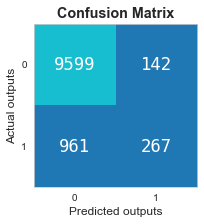

In [36]:
cmplot(confusion_matrix(y_test, y_pred_SVM))

The obtained confusion matrix shows the following results:

- True Positive (TP): There are **267** observations are predicted **correctly** for '**yes**' (the customer has made a deposit)
- True Negative (TN): There are **9599** observations are predicted **correctly** for '**no**' (the customer doesn't make a deposit)
- False Positive (FP): There are **142** observations are **wrongly** predicted as '**yes**'
- False Negative (FN): There are **961** observations are **wrongly** predicted as '**no**'

**Note**: 0 indicates a negative output because it represents the word 'no'. Otherwise, 1 indicates positive output because it represents the word 'yes'.

### 5.4. Decision Tree

Let's create a model with decision tree algorithm and train the data. Then, we will get the classification report to evaluating the model.

In [37]:
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_DT.fit(x_train_scaled, y_train)
y_pred_DT = model_DT.predict(x_test_scaled)

print(classification_report(y_test, y_pred_DT), end='')

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9741
           1       0.61      0.32      0.42      1228

    accuracy                           0.90     10969
   macro avg       0.76      0.65      0.68     10969
weighted avg       0.88      0.90      0.89     10969


We can get the accuracy score for both training and test dataset.

In [38]:
result_dt = round(model_DT.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_DT.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_dt) + '%')

Training accuracy: 89.825%
Test accuracy:     90.099%


We can try to visualize the decision tree.

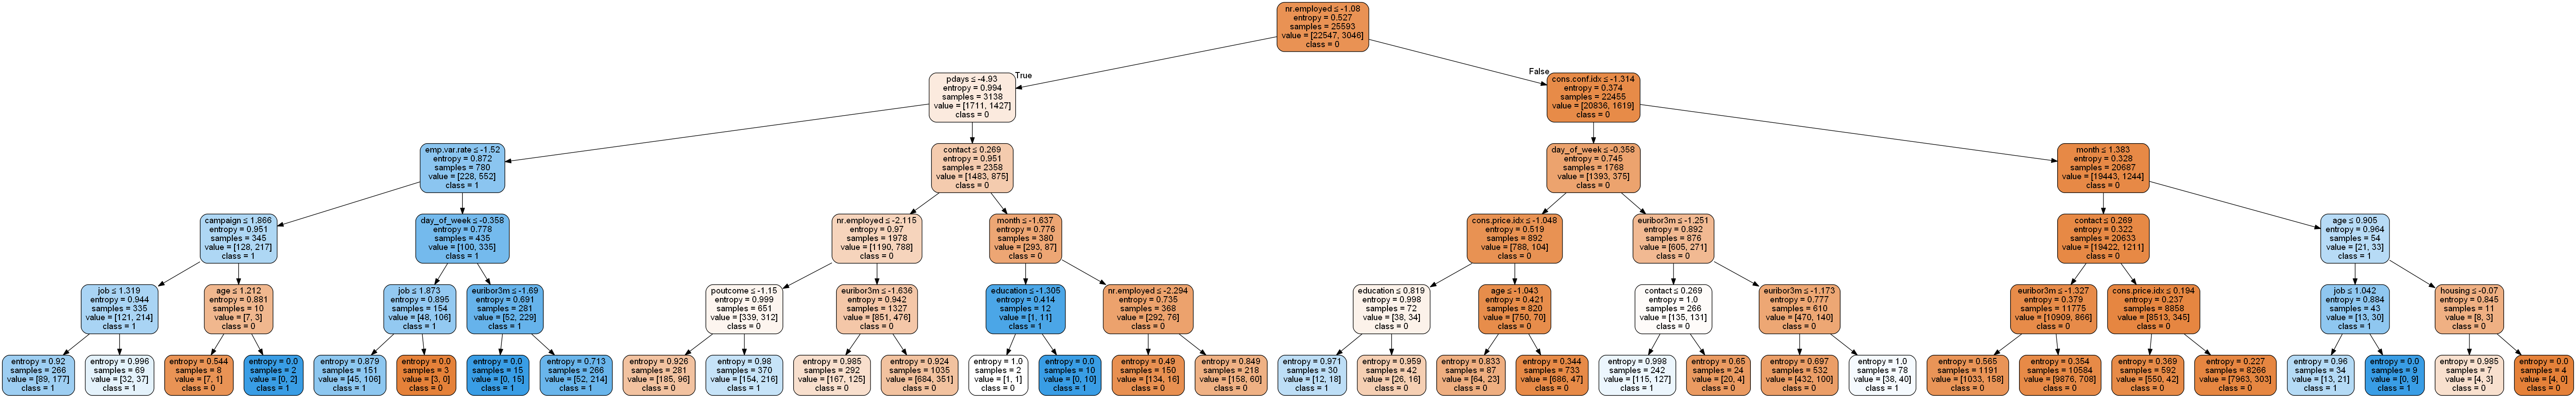

In [39]:
dot_data = StringIO()
tree.export_graphviz(
    model_DT, 
    out_file=dot_data, 
    class_names=['0','1'], 
    feature_names=list(x_train.columns), 
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

Let's visualize the confusion matrix.

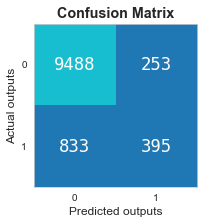

In [40]:
cmplot(confusion_matrix(y_test, y_pred_DT))

The obtained confusion matrix shows the following results:

- True Positive (TP): There are **395** observations are predicted **correctly** for '**yes**' (the customer has made a deposit)
- True Negative (TN): There are **9488** observations are predicted **correctly** for '**no**' (the customer doesn't make a deposit)
- False Positive (FP): There are **253** observations are **wrongly** predicted as '**yes**'
- False Negative (FN): There are **833** observations are **wrongly** predicted as '**no**'

**Note**: 0 indicates a negative output because it represents the word 'no'. Otherwise, 1 indicates positive output because it represents the word 'yes'.

### 5.5. Random Forest

Let's create a model with random forest algorithm and train the data. Then, we will get the classification report to evaluating the model.

In [41]:
model_RF = RandomForestClassifier(random_state=11)
model_RF.fit(x_train_scaled, y_train)
y_pred_RF = model_RF.predict(x_test_scaled)

print(classification_report(y_test, y_pred_RF), end='')

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9741
           1       0.54      0.31      0.39      1228

    accuracy                           0.89     10969
   macro avg       0.73      0.64      0.67     10969
weighted avg       0.88      0.89      0.88     10969


We can get the accuracy score for both training and test dataset.

In [42]:
result_rf = round(model_RF.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_RF.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_rf) + '%')

Training accuracy: 99.558%
Test accuracy:     89.361%


Let's visualize the confusion matrix.

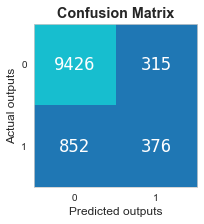

In [43]:
cmplot(confusion_matrix(y_test, y_pred_RF))

The obtained matrix confusion shows the following results:

- True Positive (TP): There are **376** observations are predicted **correctly** for '**yes**' (the customer has made a deposit)
- True Negative (TN): There are **9426** observations are predicted **correctly** for '**no**' (the customer doesn't make a deposit)
- False Positive (FP): There are **315** observations are **wrongly** predicted as '**yes**'
- False Negative (FN): There are **852** observations are **wrongly** predicted as '**no**'

**Note**: 0 indicates a negative output because it represents the word 'no'. Otherwise, 1 indicates positive output because it represents the word 'yes'.

### 5.6. Naive Bayes

Let's create a model with (Gaussian) naive Bayes algorithm and train the data. Then, we will get the classification report to evaluating the model.

In [44]:
model_GNB = GaussianNB()
model_GNB.fit(x_train_scaled, y_train)
y_pred_GNB = model_GNB.predict(x_test_scaled)

print(classification_report(y_test, y_pred_GNB), end='')

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      9741
           1       0.32      0.48      0.39      1228

    accuracy                           0.83     10969
   macro avg       0.63      0.68      0.64     10969
weighted avg       0.86      0.83      0.84     10969


We can get the accuracy score for both training and test dataset.

In [45]:
result_gnb = round(model_GNB.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_GNB.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_gnb) + '%')

Training accuracy: 83.202%
Test accuracy:     82.906%


Let's visualize the confusion matrix.

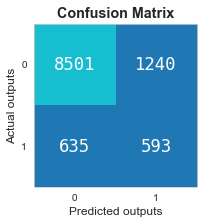

In [46]:
cmplot(confusion_matrix(y_test, y_pred_GNB))

The obtained confusion matrix shows the following results:

- True Positive (TP): There are **593** observations are predicted **correctly** for '**yes**' (the customer has made a deposit)
- True Negative (TN): There are **8501** observations are predicted **correctly** for '**no**' (the customer doesn't make a deposit)
- False Positive (FP): There are **1240** observations are **wrongly** predicted as '**yes**'
- False Negative (FN): There are **635** observations are **wrongly** predicted as '**no**'

**Note**: 0 indicates a negative output because it represents the word 'no'. Otherwise, 1 indicates positive output because it represents the word 'yes'.

---

## 6. Overall Analysis

We've performed data classification on the Bank Marketing dataset with various types of prediction model algorithms, such as: Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest, and Gaussian Naive Bayes.

Before applying the model to predict the target class, we must know first about the distribution of data and try to minimize the outliers. We've used data from `bank-additional-full.csv` file which contains 20 input variables and one target variable. The target is a consumer's decision to deposit their money in a bank with a 'yes' or 'no' value. It turns out that from the available data, the number of people who decide to deposit their money is less than those who do not (i.e. 34,806 'no' and 4,598 'yes'). Of course, such a large difference between them will affect the algorithm's decision to make more accurate predictions. But this time, let's just leave it as it is for now. We've splitted our dataset into training and test set with 7:3 ratio.

From the various model algorithms that we have performed, it turns out that using **Decision Tree** algorithm results a higher score of accuracy compared to other algorithms, which is **90.099%**. Accuracy can be said to be the level of closeness of the predicted value to the actual value.  Of course, that numbers can be increased if we optimize the model parameters. For KNN, we've also done the process of selecting the best K value, which has decided that K=22 is our best value. We have also provided the results of the confusion matrix in each model.

Graph provided below is a comparison between accuracy score of the algorithm models that we've run above. 

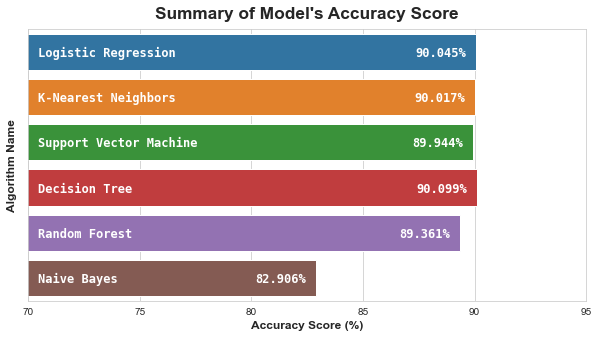

In [47]:
res = pd.DataFrame({
    'Algorithm': [
        'Logistic Regression', 
        'K-Nearest Neighbors', 
        'Support Vector Machine', 
        'Decision Tree', 
        'Random Forest', 
        'Naive Bayes'
    ], 
    'Accuracy': [result_lr, result_knn, result_svm, result_dt, result_rf, result_gnb]
})

fig = plt.figure(figsize=(10, 5))

ax = sns.barplot(data=res, x='Accuracy', y='Algorithm')
ax.set(xlim=(70, 95))

for i, p in enumerate(ax.patches):
    ax.annotate(str(p.get_width()) + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2), 
                textcoords="offset points", xytext=(-10,-5), ha='right', 
                color='white', fontsize='large', fontweight='bold', family='monospace')
    ax.annotate(res['Algorithm'][i], xy=(70, p.get_y()+p.get_height()/2), 
                textcoords="offset points", xytext=(10,-5), ha='left', 
                color='white', fontsize='large', fontweight='bold', family='monospace')

plt.title('Summary of Model\'s Accuracy Score', fontsize='xx-large', fontweight='bold', pad=10)
ax.set_yticklabels(labels='')
ax.set_xlabel('Accuracy Score (%)', fontsize='large', fontweight='bold')
ax.set_ylabel('Algorithm Name', fontsize='large', fontweight='bold')

plt.show()